# Clustering 

Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.

Clustering analysis can be done on the basis of features where we try to find subgroups of samples based on features or on the basis of samples where we try to find subgroups of features based on samples. We’ll cover here clustering based on features. Clustering is used in market segmentation; where we try to fined customers that are similar to each other whether in terms of behaviors or attributes, image segmentation/compression; where we try to group similar regions together, document clustering based on topics, etc.

Unlike supervised learning, clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups.

# Import Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading DataSet

In [2]:
df = pd.read_csv('Countries_exercise.csv')
df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [3]:
df.shape

(241, 3)

# Visualization of DataSet

Text(0, 0.5, 'Latitude')

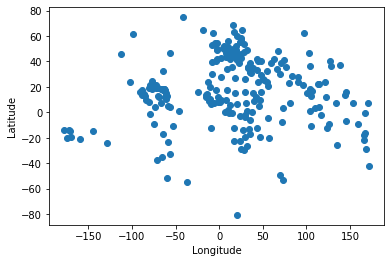

In [4]:
plt.scatter(df.Longitude,df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Longitude','Latitude']])
y_predicted

array([1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0,
       2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1,
       0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2,
       2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2])

In [6]:
df['cluster'] = y_predicted
df.head()

,name,Longitude,Latitude,cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,2


In [7]:
km.cluster_centers_

array([[118.77977737,   7.00888465],
       [-81.36774913,   6.6860381 ],
       [ 21.83186199,  25.42957311]])

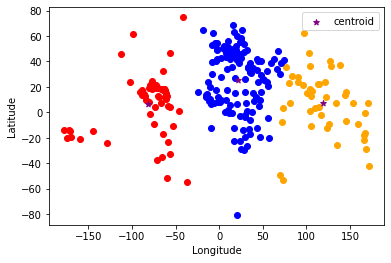

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Longitude,df1['Latitude'],color='orange')
plt.scatter(df2.Longitude,df2['Latitude'],color='red')
plt.scatter(df3.Longitude,df3['Latitude'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Elbow Plot

In [9]:
k_rng = range(1,10)
k_rng

range(1, 10)

In [10]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Longitude','Latitude']])
    sse.append(km.inertia_)

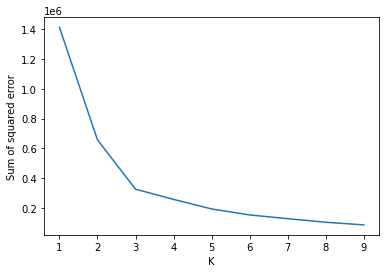

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)